**Importing** **libraries**

In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from scipy.io.arff import loadarff

**Loading** **Dataset**

In [ ]:
ch = pd.read_csv("/content/Adolescent_data.csv")

**Understanding** **Data**

In [ ]:
ch.shape

(104, 22)

In [ ]:
ch.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,2,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,3,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,AmericanSamoa,no,2,12-16 years,NaN,NO
3,4,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,5,1,1,1,1,1,1,1,0,0,...,f,NaN,no,no,Albania,no,7,12-16 years,NaN,YES


In [ ]:
ch.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          6
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           6
Class/ASD          0
dtype: int64

In [ ]:

#total Missing values
ch.isnull().sum().sum()

12

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               104 non-null    int64 
 1   A1_Score         104 non-null    int64 
 2   A2_Score         104 non-null    int64 
 3   A3_Score         104 non-null    int64 
 4   A4_Score         104 non-null    int64 
 5   A5_Score         104 non-null    int64 
 6   A6_Score         104 non-null    int64 
 7   A7_Score         104 non-null    int64 
 8   A8_Score         104 non-null    int64 
 9   A9_Score         104 non-null    int64 
 10  A10_Score        104 non-null    int64 
 11  age              104 non-null    int64 
 12  gender           104 non-null    object
 13  ethnicity        98 non-null     object
 14  jundice          104 non-null    object
 15  austim           104 non-null    object
 16  contry_of_res    104 non-null    object
 17  used_app_before  104 non-null    ob

In [ ]:
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.00000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,0.730769,0.538462,0.653846,0.701923,0.75000,0.769231,0.519231,0.615385,0.788462,0.653846,14.134615,6.721154
std,30.166206,0.445708,0.500933,0.478047,0.459629,0.43511,0.423365,0.502050,0.488860,0.410377,0.478047,1.576882,2.200868
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,26.750000,0.000000,0.000000,0.000000,0.000000,0.75000,1.000000,0.000000,0.000000,1.000000,0.000000,13.000000,6.000000
50%,52.500000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,7.000000
75%,78.250000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,8.000000
max,104.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,10.000000


In [ ]:
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  63
No of children not diagonised with ASD =  41


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


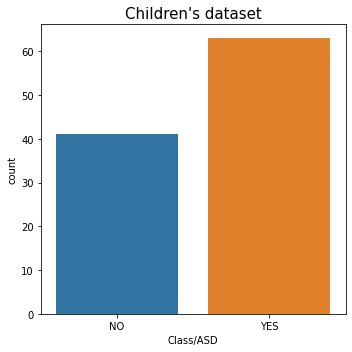

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(ch['Class/ASD'])
ax.set_title("Children's dataset",fontsize = 15)
fig.tight_layout()

In [ ]:

fig = px.histogram(ch[ch['Class/ASD'] == 'YES'], x="age", color="gender")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "Age distribution of ASD positive children over gender"
    )
fig.update_traces(marker_line_width=1)
fig.show()

In [ ]:
ch.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          6
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           6
Class/ASD          0
dtype: int64

In [ ]:
ch[['age', 'ethnicity','relation']] = ch[['age', 'ethnicity','relation']].fillna(ch[['age', 'ethnicity','relation']].mean)

In [ ]:
ch.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               104 non-null    int64 
 1   A1_Score         104 non-null    int64 
 2   A2_Score         104 non-null    int64 
 3   A3_Score         104 non-null    int64 
 4   A4_Score         104 non-null    int64 
 5   A5_Score         104 non-null    int64 
 6   A6_Score         104 non-null    int64 
 7   A7_Score         104 non-null    int64 
 8   A8_Score         104 non-null    int64 
 9   A9_Score         104 non-null    int64 
 10  A10_Score        104 non-null    int64 
 11  age              104 non-null    int64 
 12  gender           104 non-null    object
 13  ethnicity        104 non-null    object
 14  jundice          104 non-null    object
 15  austim           104 non-null    object
 16  contry_of_res    104 non-null    object
 17  used_app_before  104 non-null    ob

**preprocessing**

In [ ]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
ch['Class/ASD']= le.fit_transform(ch['Class/ASD'])

ch['Class/ASD'].unique()

array([0, 1])

In [ ]:


ch['age'] = ch['age'].astype(str)
ch['age']= le.fit_transform(ch['age'])

In [ ]:
ch['gender']= le.fit_transform(ch['gender'])

In [ ]:
ch['ethnicity'] = ch['ethnicity'].astype(str)
ch['ethnicity']= le.fit_transform(ch['ethnicity'])

In [ ]:
ch['jundice']= le.fit_transform(ch['jundice'])

In [ ]:
ch['austim']= le.fit_transform(ch['austim'])

In [ ]:
ch['contry_of_res']= le.fit_transform(ch['contry_of_res'])

In [ ]:
ch['used_app_before']= le.fit_transform(ch['used_app_before'])


In [ ]:
ch.drop(columns=['age_desc'],axis = 1,inplace=True)

In [ ]:
ch['relation'] = ch['relation'].astype(str)
ch['relation']= le.fit_transform(ch['relation'])

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               104 non-null    int64
 1   A1_Score         104 non-null    int64
 2   A2_Score         104 non-null    int64
 3   A3_Score         104 non-null    int64
 4   A4_Score         104 non-null    int64
 5   A5_Score         104 non-null    int64
 6   A6_Score         104 non-null    int64
 7   A7_Score         104 non-null    int64
 8   A8_Score         104 non-null    int64
 9   A9_Score         104 non-null    int64
 10  A10_Score        104 non-null    int64
 11  age              104 non-null    int64
 12  gender           104 non-null    int64
 13  ethnicity        104 non-null    int64
 14  jundice          104 non-null    int64
 15  austim           104 non-null    int64
 16  contry_of_res    104 non-null    int64
 17  used_app_before  104 non-null    int64
 18  result    

**z**-**score**

In [ ]:
import scipy.stats as stats

In [ ]:
chz=stats.zscore(ch)
chz

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,-1.715476,-1.647509,-1.080123,-1.374369,0.651658,0.577350,0.547723,0.96225,0.790569,0.517970,...,0.551452,1.03923,-0.701391,2.345208,2.535463,-1.236366,-0.2,-0.329255,-0.421767,-1.239591
1,-1.682166,-1.647509,-1.080123,-1.374369,-1.534548,-1.732051,-1.825742,-1.03923,-1.264911,0.517970,...,0.551452,1.03923,-1.043854,-0.426401,-0.394405,-1.236366,-0.2,-2.155521,0.253060,-1.239591
2,-1.648855,-1.647509,-1.080123,-1.374369,-1.534548,-1.732051,-1.825742,-1.03923,-1.264911,0.517970,...,-1.360249,-0.96225,-1.728780,-0.426401,-0.394405,-1.600879,-0.2,-2.155521,-2.446248,-1.239591
3,-1.615545,-1.647509,0.925820,0.727607,0.651658,0.577350,0.547723,-1.03923,0.790569,0.517970,...,-0.085781,-0.96225,1.010925,-0.426401,-0.394405,0.950714,-0.2,0.127312,0.927887,0.806718
4,-1.582235,0.606977,0.925820,0.727607,0.651658,0.577350,0.547723,0.96225,-1.264911,-1.930615,...,1.188686,-0.96225,-1.728780,-0.426401,-0.394405,-1.692007,-0.2,0.127312,-2.446248,0.806718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.582235,-1.647509,0.925820,0.727607,0.651658,-1.732051,0.547723,0.96225,-1.264911,0.517970,...,1.188686,-0.96225,-0.016465,-0.426401,-0.394405,-1.509751,5.0,-0.329255,-0.421767,-1.239591
100,1.615545,0.606977,-1.080123,0.727607,-1.534548,-1.732051,-1.825742,-1.03923,0.790569,-1.930615,...,1.188686,1.03923,-1.386317,-0.426401,-0.394405,0.039431,-0.2,-1.242388,-0.421767,-1.239591
101,1.648855,0.606977,-1.080123,-1.374369,0.651658,0.577350,0.547723,0.96225,0.790569,0.517970,...,-1.360249,-0.96225,1.010925,-0.426401,-0.394405,0.950714,-0.2,0.583878,0.927887,0.806718
102,1.682166,0.606977,0.925820,-1.374369,0.651658,0.577350,-1.825742,-1.03923,-1.264911,0.517970,...,-0.723015,-0.96225,1.010925,-0.426401,-0.394405,0.950714,-0.2,-0.329255,0.927887,-1.239591


In [ ]:
'''chz['Class/ASD']=chz['Class/ASD'].astype(int)'''
chz=chz.astype(int)
chz.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,-1,-1,-1,-1,0,0,0,0,0,0,...,0,1,0,2,2,-1,0,0,0,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,...,0,1,-1,0,0,-1,0,-2,0,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,0,-1,0,0,-1,0,-2,-2,-1
3,-1,-1,0,0,0,0,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,-1,-1,...,1,0,-1,0,0,-1,0,0,-2,0


**Model** **Fitting**

In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
#Extracting Independent and dependent Variable
x = chz.drop('Class/ASD', axis=1)
y = chz['Class/ASD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)


**svm**

In [ ]:
#DataFrame for Models Accuracy Score
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 96.15384615384616


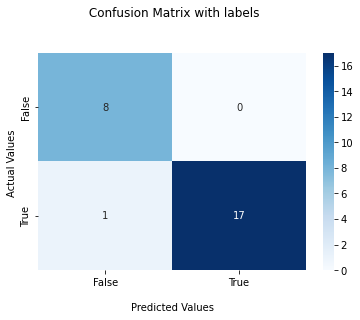

Sensitivity :  1.0
Specificity :  0.9444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"SVM", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**Adaboostclassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 88.46153846153845


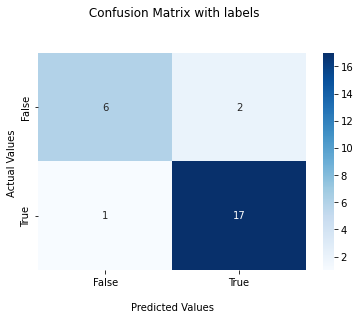

Sensitivity :  0.75
Specificity :  0.9444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"Adaboost Classifier", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**Decision** **Tree** **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 88.46153846153845


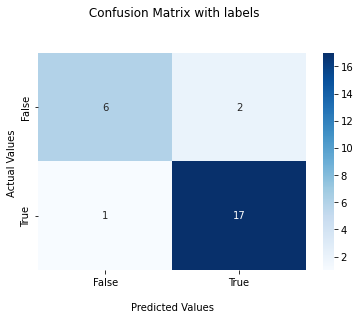

Sensitivity :  0.75
Specificity :  0.9444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**LinearDiscriminantAnalysis**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print(' Accuracy is: %.3f ' % (mean(scores)*100))

 Accuracy is: 98.091 


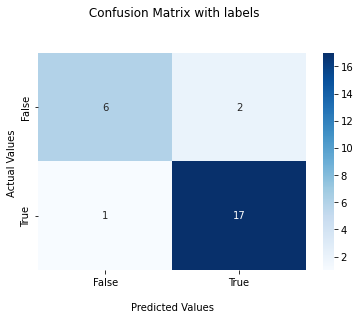

Sensitivity :  0.75
Specificity :  0.9444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"Linear Discriminant Analysis", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**RANDOM FOREST CLASSIFIER**

In [ ]:
import numpy as np

In [ ]:
seed=7
np.random.seed(seed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=seed)

In [ ]:
rfc.fit(x_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 88.46153846153845


In [ ]:
new_row = {"Model Name":"Random Forest ", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

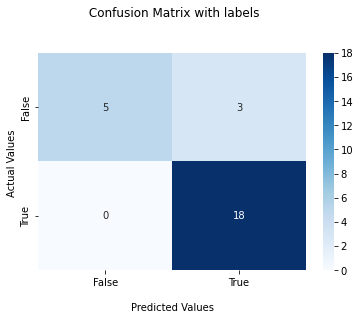

Sensitivity :  0.625
Specificity :  1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


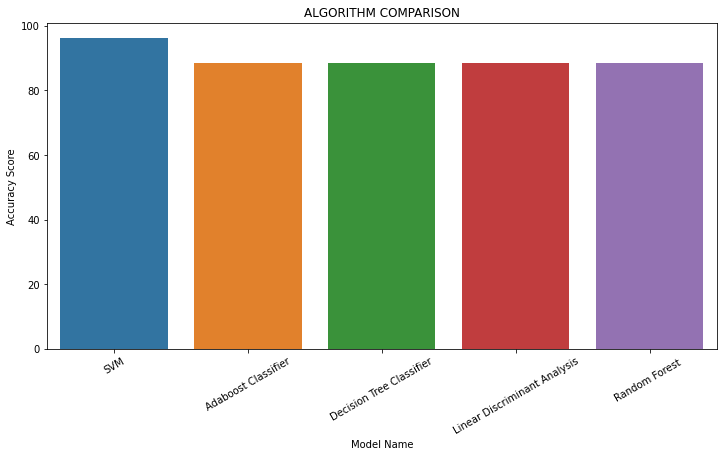

In [ ]:
plt.figure(figsize=(12,6))
plt.title("ALGORITHM COMPARISON")
sns.barplot(x=model_df["Model Name"], y=model_df["Accuracy Score"])
plt.xticks(rotation=30)
plt.show()